In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

In [2]:
df=pd.read_csv('premierleague.txt',sep=',')
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,30-185,1990,13.7,0,15,...,20.6,3,0,0,0.8,0.8,0.05,-0.8,-0.8,Matches
1,2,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,23-151,1997,11.3,6,31,...,9.9,0,0,0,5.6,5.6,0.18,0.4,0.4,Matches
2,3,Che Adams\Che-Adams,eng ENG,FW,Southampton,24-232,1996,21.2,4,40,...,13.5,0,0,0,5.3,5.3,0.13,-1.3,-1.3,Matches
3,4,Tosin Adarabioyo\Tosin-Adarabioyo,eng ENG,DF,Fulham,23-159,1997,22.0,0,17,...,9.0,0,0,0,0.9,0.9,0.06,-0.9,-0.9,Matches
4,5,Adrián\Adrian,es ESP,GK,Liverpool,34-058,1987,3.0,0,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches


In [3]:
df.shape

(505, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rk       505 non-null    int64  
 1   Player   505 non-null    object 
 2   Nation   505 non-null    object 
 3   Pos      505 non-null    object 
 4   Squad    505 non-null    object 
 5   Age      505 non-null    object 
 6   Born     505 non-null    int64  
 7   90s      505 non-null    float64
 8   Gls      505 non-null    int64  
 9   Sh       505 non-null    int64  
 10  SoT      505 non-null    int64  
 11  SoT%     415 non-null    float64
 12  Sh/90    505 non-null    float64
 13  SoT/90   505 non-null    float64
 14  G/Sh     415 non-null    float64
 15  G/SoT    338 non-null    float64
 16  Dist     415 non-null    float64
 17  FK       505 non-null    int64  
 18  PK       505 non-null    int64  
 19  PKatt    505 non-null    int64  
 20  xG       505 non-null    float64
 21  npxG     505 non

In [5]:
df.isnull().sum()

Rk           0
Player       0
Nation       0
Pos          0
Squad        0
Age          0
Born         0
90s          0
Gls          0
Sh           0
SoT          0
SoT%        90
Sh/90        0
SoT/90       0
G/Sh        90
G/SoT      167
Dist        90
FK           0
PK           0
PKatt        0
xG           0
npxG         0
npxG/Sh     90
G-xG         0
np:G-xG      0
Matches      0
dtype: int64

In [6]:
df['Player']=df['Player'].str.split('\\',expand=True)[0]

In [7]:
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,30-185,1990,13.7,0,15,...,20.6,3,0,0,0.8,0.8,0.05,-0.8,-0.8,Matches
1,2,Tammy Abraham,eng ENG,FW,Chelsea,23-151,1997,11.3,6,31,...,9.9,0,0,0,5.6,5.6,0.18,0.4,0.4,Matches
2,3,Che Adams,eng ENG,FW,Southampton,24-232,1996,21.2,4,40,...,13.5,0,0,0,5.3,5.3,0.13,-1.3,-1.3,Matches
3,4,Tosin Adarabioyo,eng ENG,DF,Fulham,23-159,1997,22.0,0,17,...,9.0,0,0,0,0.9,0.9,0.06,-0.9,-0.9,Matches
4,5,Adrián,es ESP,GK,Liverpool,34-058,1987,3.0,0,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches


In [8]:
df['Player'].unique()

array(['Patrick van Aanholt', 'Tammy Abraham', 'Che Adams',
       'Tosin Adarabioyo', 'Adrián', 'Sergio Agüero', 'Ola Aina',
       'Rayan Aït Nouri', 'Semi Ajayi', 'Nathan Aké', 'Marc Albrighton',
       'Thiago Alcántara', 'Toby Alderweireld', 'Rúnar Alex Rúnarsson',
       'Trent Alexander-Arnold', 'Ezgjan Alioski', 'Alisson', 'Allan',
       'Dele Alli', 'Miguel Almirón', 'Marcos Alonso', 'Steven Alzate',
       'Daniel Amartey', 'Ethan Ampadu', 'Joachim Andersen',
       'Elliot Anderson', 'Felipe Anderson', 'Michail Antonio',
       'Alphonse Areola', 'Stuart Armstrong', 'Kepa Arrizabalaga',
       'Pierre-Emerick Aubameyang', 'Serge Aurier', 'Charlie Austin',
       'Jordan Ayew', 'Luke Ayling', 'César Azpilicueta', 'Eric Bailly',
       'Fabián Balbuena', 'George Baldock', 'Gareth Bale',
       'Patrick Bamford', 'Phil Bardsley', 'Ross Barkley',
       'Ashley Barnes', 'Harvey Barnes', 'Kyle Bartley', 'Chris Basham',
       'Michy Batshuayi', 'Jan Bednarek', 'Donny van de Beek

In [9]:
df=df[(df['Player']=='Raheem Sterling')|(df['Player']=='Mohamed Salah')]
df

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
398,399,Mohamed Salah,eg EGY,FW,Liverpool,28-260,1992,23.4,17,73,...,16.1,1,6,6,13.7,9.2,0.13,3.3,1.8,Matches
431,432,Raheem Sterling,eng ENG,FW,Manchester City,26-084,1994,20.9,9,44,...,13.3,2,0,1,9.0,8.3,0.19,0.0,0.7,Matches


In [10]:
df['Nation']=df['Nation'].str.split(' ',expand=True)[1]

In [11]:
df['Age']=df['Age'].str.split('-',expand=True)[0]

In [12]:
df=df.reset_index(drop=True)

In [13]:
df

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,399,Mohamed Salah,EGY,FW,Liverpool,28,1992,23.4,17,73,...,16.1,1,6,6,13.7,9.2,0.13,3.3,1.8,Matches
1,432,Raheem Sterling,ENG,FW,Manchester City,26,1994,20.9,9,44,...,13.3,2,0,1,9.0,8.3,0.19,0.0,0.7,Matches


In [14]:
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Gls',
       'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK',
       'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Matches'],
      dtype='object')

   ## Explanation

Short    |Long 
-----    |----- 
GLS      |Goals
Sh       |Shoots
SoT      |Shots on Target
SoT %    |Shots on Target (%)
SH/90    |Shoots per 90 minutes
SoT/90   |Shots on Target per 90 minutes
G/Sh     |Goals / Shoot 
G/Sot    |Goals/ Shots on Target
Dist     |Distance
xG       |Expected Goals
npxG     |Non-Penalty Expected Goals
npXG/Sh  |Non-Penalty Expected Goals/Shoot
G-xG     |Goals - Expected Goals 
Np:G-xG  |Non-Penalty Expected Goals - Expected Goals


In [15]:
df = df.drop(['Rk','Nation','Pos','Squad','Age','Born','90s','FK','PK','PKatt','Matches'],axis=1)
df

,Player,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Mohamed Salah,17,73,30,41.1,3.13,1.28,0.15,0.37,16.1,13.7,9.2,0.13,3.3,1.8
1,Raheem Sterling,9,44,22,50.0,2.11,1.05,0.20,0.41,13.3,9.0,8.3,0.19,0.0,0.7


In [16]:
params = list(df.columns)
params = params[1:]
params

['Gls',
 'Sh',
 'SoT',
 'SoT%',
 'Sh/90',
 'SoT/90',
 'G/Sh',
 'G/SoT',
 'Dist',
 'xG',
 'npxG',
 'npxG/Sh',
 'G-xG',
 'np:G-xG']

In [17]:
ranges = []
a_values = []
b_values = []

for x in params:
    a = min(df[params][x])
    a = a - (a*.25)
    
    b = max(df[params][x])
    b = b + (b*.25)
    
    ranges.append((a,b))
    
for x in range(len(df['Player'])):
    if df['Player'][x] == 'Raheem Sterling':
        a_values = df.iloc[x].values.tolist()
    if df['Player'][x] == 'Mohamed Salah':
        b_values = df.iloc[x].values.tolist()
        
a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values,b_values]

In [18]:
title = dict(
    title_name='Raheem Sterling',
    title_color = 'blue',
    subtitle_name = 'Manchester City',
    subtitle_color = 'blue',
    title_name_2='Mohamed Salah',
    title_color_2 = 'red',
    subtitle_name_2 = 'Liverpool',
    subtitle_color_2 = 'red',
    title_fontsize = 18,
    subtitle_fontsize=15
)

endnote = '@Coshguns\ndata via FBREF / Statsbomb'

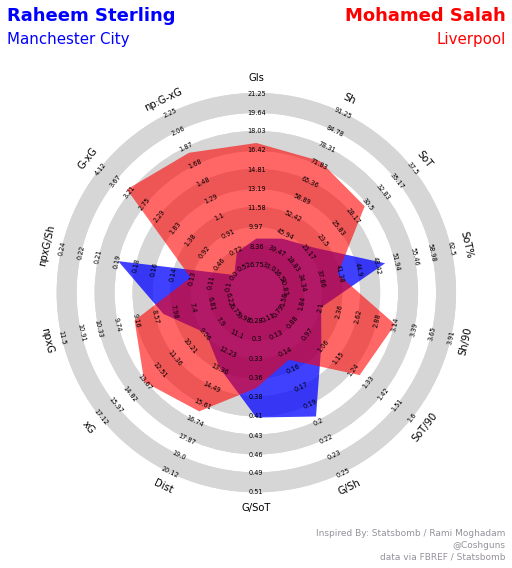

In [24]:
radar = Radar()

fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                         radar_color=['blue','red'],
                         alphas=[.75,.6],title=title,endnote=endnote,
                         compare=True)
plt.show()